# Histogram Equalization

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

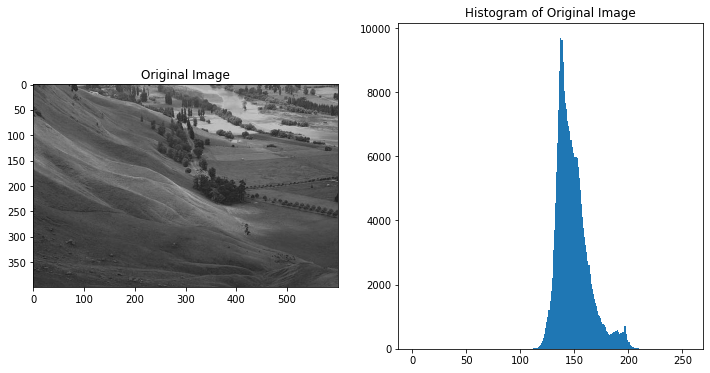

In [2]:
PATH = 'images/histogram.jpg'
img = cv2.imread(PATH, 0)


fix, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original Image')
ax[1].hist(img.ravel(), 256, [0, 256])
ax[1].set_title('Histogram of Original Image')
plt.show()

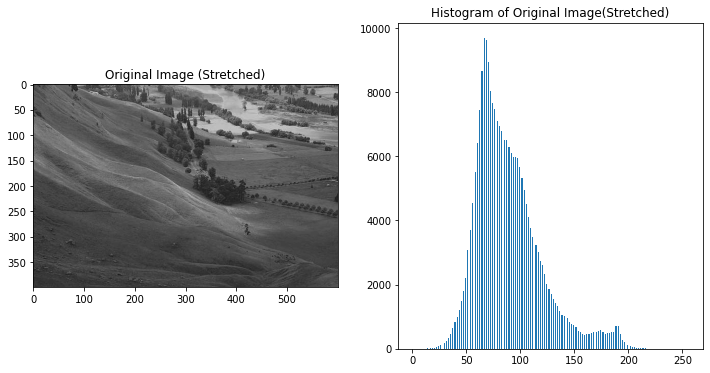

In [3]:
a_min = img.min()
a_max = img.max()
row, col = img.shape[:2]

for i in range (row):
    for j in range(col):
        img[i][j] = (((img[i][j] - a_min) / (a_max - a_min)) *255)
img = img.astype(np.uint8)

fix, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original Image (Stretched)')
ax[1].hist(img.ravel(), 256, [0, 256])
ax[1].set_title('Histogram of Original Image(Stretched)')
plt.show()

In [4]:
image_size = row * col
print(f'Pixels: {image_size}')

Pixels: 240000


In [5]:
frequency = np.zeros(256)
frequency_out = np.zeros(256)
probability = np.zeros(256)
histogram_out = np.zeros(256)
hist_out = np.zeros(256)

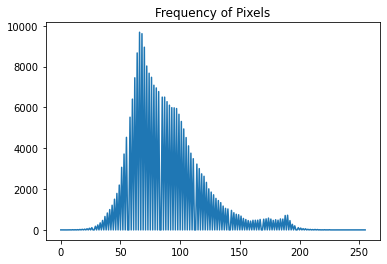

In [6]:
for i in range(row):
    for j in range(col):
        frequency[img[i, j]] += 1

plt.plot(frequency)
plt.title('Frequency of Pixels')
plt.show()

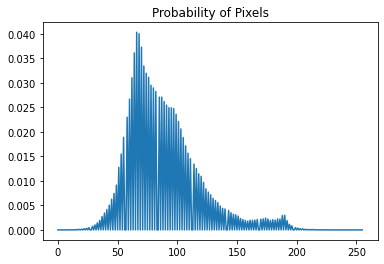

In [7]:
for i in range(256):
    probability[i] = frequency[i] / image_size

plt.plot(probability)
plt.title('Probability of Pixels')
plt.show()

In [8]:
cdf = np.zeros(256)
rounded = np.zeros(256)

sum_hist = 0
for i in range(256):
    sum_hist += probability[i]
    cdf[i] = sum_hist + probability[i]
    rounded[i] = round(cdf[i] * 255)

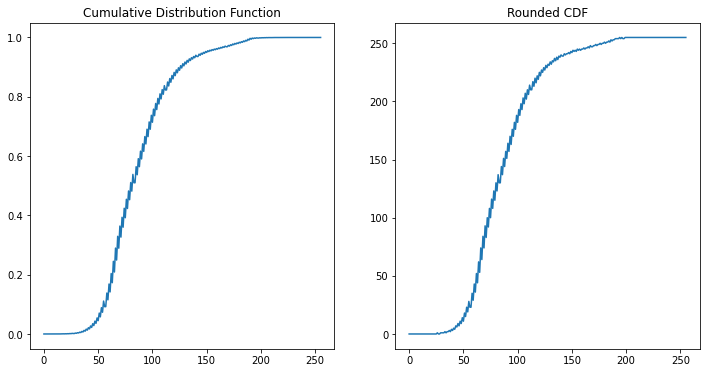

In [9]:
fix, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].plot(cdf)
ax[0].set_title('Cumulative Distribution Function')
ax[1].plot(rounded)
ax[1].set_title('Rounded CDF')
plt.show()

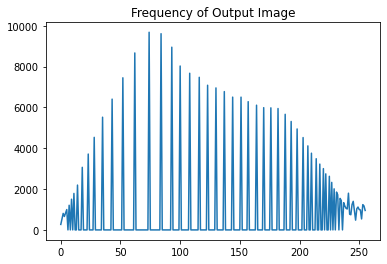

In [10]:
for i in range(row):
    for j in range(col):
        x = img[i][j]
        img[i][j] = rounded[x]

# CDF of output
for i in range(row):
    for j in range(col):
        frequency_out[img[i, j]] += 1

plt.plot(frequency_out)
plt.title('Frequency of Output Image')
plt.show()

In [11]:
for i in range(256):
    histogram_out[i] = frequency_out[i]

sum_hist = 0
for i in range(256):
    sum_hist = sum_hist + histogram_out[i]
    hist_out[i] = sum_hist

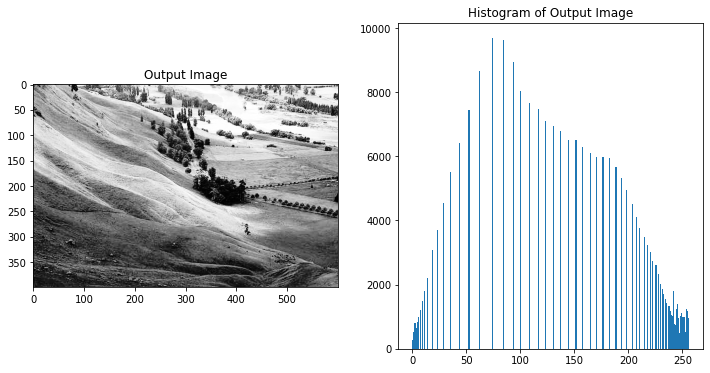

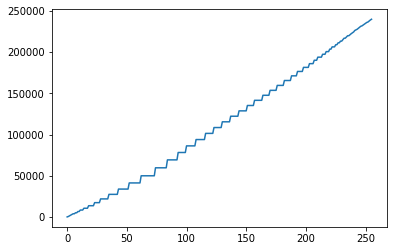

In [12]:
fix, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Output Image')
ax[1].hist(img.ravel(), 256, [0, 256])
ax[1].set_title('Histogram of Output Image')
plt.show()

plt.plot(hist_out)
plt.show()